In [26]:
import os
import nibabel as nib
import pylab as plt
import numpy as np


In [27]:
from functions import *
from classes import *

In [28]:
proj_root = parent_directory()
print(proj_root)
input_filepath = os.path.join(proj_root, "media/sub-01/anat/sub-01_T2w.nii.gz")
output_folder = os.path.join(proj_root, "output/")


/Users/joachimpfefferkorn/repos/neurovolume


In [29]:
fmri = MRI_Anat(input_filepath)

In [41]:
#print(type(fmri.brain_img.get_fdata()[0][0][0]))
#Good to know for the VDB creation grid types!
#print(fmri.brain_img.header["sizeof_hdr"])
print(fmri.brain_img.header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 57
dim             : [  3 512 512  35   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.     0.5    0.5    4.     6.255  0.     0.     0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'TE=1e+02;Time=181438.000')
aux_file        : np.bytes_(b'imgComments')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.

relink debug


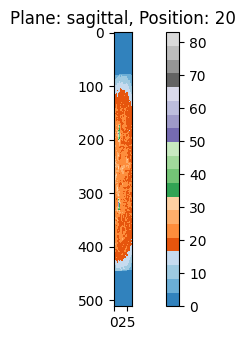

relink debug


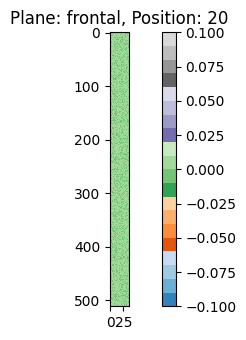

relink debug


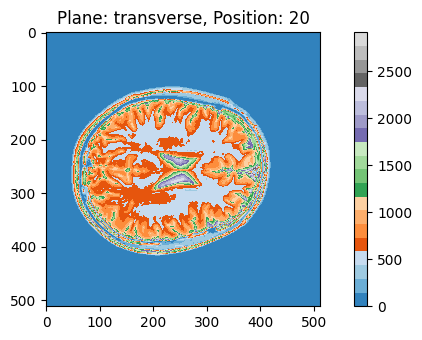

In [31]:
fmri.view_slice(plane="sagittal")
fmri.view_slice(plane="frontal")
fmri.view_slice(plane="transverse")

In [32]:
# def show_3D_debug(array):
#     #More or less copypasta This needs work!
#     plt.rcParams["figure.figsize"] = [7.00, 3.50]
#     plt.rcParams["figure.autolayout"] = True
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     z, x, y = array.nonzero()
#     ax.scatter(x, y, z, c=z, alpha=1)
#     plt.show()

# show_3D_debug(fmri.brain_data)

KeyboardInterrupt: 

# Affine Transforms
[relevant NiBabel Documentation](https://nipy.org/nibabel/coordinate_systems.html)
As we can see from the above work and visualizations, our volume does not account for $z$ depth. We need to use the affine to transform this voxel data into an anatomically accurate volume.

Let's call this new volume `anat_vol`. It will hold an anatomically accurate volume of each voxel corresponding a specific part of the brain as it existed in the scanner. As per NiBabel specifications, will be in $RAS+$ space, meaning $Right$, $Anterior$, $Superior$, are all positive values along these ordered axis.

*Mild Extrapolation*: the raw voxel data seems to iterate each slice by just one integer, thus encoding order but not exact position. This particular scan seems to have taken slices down the saggital ($z$) plane. Thus the brain appears to be vertically squashed down. The affine stored in this header will "inflate" the brain to it's anatomically accurate, real-life, geometry

The $4 \times 4$ image $affine$ array stored in `brain_img.affine` can be used to get this accurate geometry.
This affine includes the following:
- Combined zoom and rotation matrices (seen here in the $m_{\:row,\: column}$)
- Translation units $a$, $b$, and $c$
- An additional row of $[0,0,0,1]$ to create homogenous coordinates (allows us to have both translation, rotation, and zooms in the same matrix)

\begin{matrix}
m_{1,1} & m_{1,2} & m_{1,3} & a\\
m_{2,1} & m_{2,2} & m_{2,3} & b \\
m_{3,1} & m_{3,2} & m_{3,3} & c \\
0 & 0 & 0 & 1
\end{matrix}


In [42]:
print(fmri.brain_img.affine)


[[  -0.5           0.           -0.          129.70300293]
 [  -0.            0.5          -0.         -110.68299866]
 [   0.            0.            4.          -74.83930206]
 [   0.            0.            0.            1.        ]]
